# Chapter 6 - IMDB Movie Reviews Binary Classification with RNNS

In [1]:
import random
import numpy as np
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten, LSTM
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.preprocessing.sequence import pad_sequences

## Load and Prepare Dataset

In [2]:
(x_train, train_labels), (x_test, test_labels) = imdb.load_data(num_words = 10000)

maxlen = 500
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

##

## Decode to English

In [3]:
def decode_to_english(sequence):

  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])
  
  return decoded_review

index = random.randint(0, len(x_train))
sequence = x_train[index]
decoded_sequence = decode_to_english(sequence = sequence)

print(f'Sequence: {sequence}\nDecoded Sequence: {decoded_sequence}')

1654784/1641221 [==============================] - 0s 0us/step
Sequence: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

## Build the Model

In [12]:
def build_model(dim):
  model = Sequential()

  # Add layers
  model.add(Embedding(input_dim = 10000, output_dim = 32))
  model.add(LSTM(units = 32))
  model.add(Dense(units = 1, activation = 'sigmoid'))

  # Compile model
  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [5]:
def train_model(model, x_train, y_train, epochs, batch_size, validation_split):
  history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split, verbose = 2)
  return history

## Graph Training Process

In [6]:
def plot(ax, history, metric):
  ax.set_title(f'{metric} per Epoch')
  ax.plot(history.history[metric], label = metric)
  ax.plot(history.history['val_' + metric], 'ro', label = f'Validation {metric}')
  ax.legend()  

## Evaluate the Model

In [7]:
def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test, verbose = 0)
  return results

## Wrap Up

In [8]:
# Convert labels to numpy array
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Epoch 1/10
157/157 - 81s - loss: 0.5164 - accuracy: 0.7577 - val_loss: 0.3741 - val_accuracy: 0.8460
Epoch 2/10
157/157 - 47s - loss: 0.3005 - accuracy: 0.8832 - val_loss: 0.3278 - val_accuracy: 0.8614
Epoch 3/10
157/157 - 47s - loss: 0.2356 - accuracy: 0.9111 - val_loss: 0.4279 - val_accuracy: 0.8580
Epoch 4/10
157/157 - 47s - loss: 0.2051 - accuracy: 0.9248 - val_loss: 0.2892 - val_accuracy: 0.8796
Epoch 5/10
157/157 - 47s - loss: 0.1797 - accuracy: 0.9367 - val_loss: 0.3124 - val_accuracy: 0.8760
Epoch 6/10
157/157 - 47s - loss: 0.1580 - accuracy: 0.9439 - val_loss: 0.3148 - val_accuracy: 0.8644
Epoch 7/10
157/157 - 47s - loss: 0.1432 - accuracy: 0.9503 - val_loss: 0.3050 - val_accuracy: 0.8798
Epoch 8/10
157/157 - 47s - loss: 0.1358 - accuracy: 0.9520 - val_loss: 0.3122 - val_accuracy: 0.8806
Epoch 9/10
157/157 - 47s - loss: 0.1234 - accuracy: 0.9575 - val_loss: 0.3266 - val_accuracy: 0.8814
Epoch 10/10
157/157 - 47s - loss: 0.1156 - accuracy: 0.9611 - val_loss: 0.3886 - val_accura

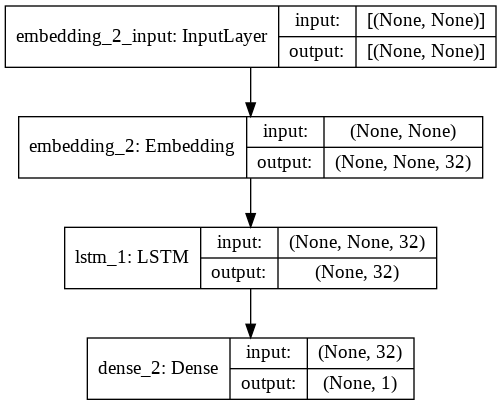

In [13]:
# Build and train the model
model = build_model(dim = x_train.shape[1])

history = train_model(
    model = model,
    x_train = x_train, 
    y_train = y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

model.summary()
plot_model(model, show_shapes = True)  

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 3))

# Graph training process
plot(ax[0], history, 'loss')
plot(ax[1], history, 'accuracy')
plt.show()

In [ ]:
# Evaluate the model
loss, acc = evaluate_model(model, x_test, y_test)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(acc * 100, 2)}%')